In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 11]

In [2]:
def get_file_data(folder):
    data = {}
    for filename in os.listdir(folder):
        if filename.endswith(".csv") and ('progress' in filename):
            df = pd.read_csv(folder + "/" + filename)
            data[os.path.splitext(filename)[0]] = df
            continue
        else:
            continue
    return data

In [3]:
data_double = './lstm-net/recurrent-neural-net/data/net-double-5x100/progress.csv'
data_float = './lstm-net/recurrent-neural-net/data/net-float-5x100/progress.csv'
df_float = pd.read_csv(data_float)
df_double = pd.read_csv(data_double)

In [4]:
def add_delta(df):
    df['FWdelta'] = df.FWtime.diff()
    df.loc[0,'FWdelta'] = 0
    df['BWdelta'] = df.BWtime.diff()
    df.loc[0,'BWdelta'] = 0

add_delta(df_double)
add_delta(df_float)

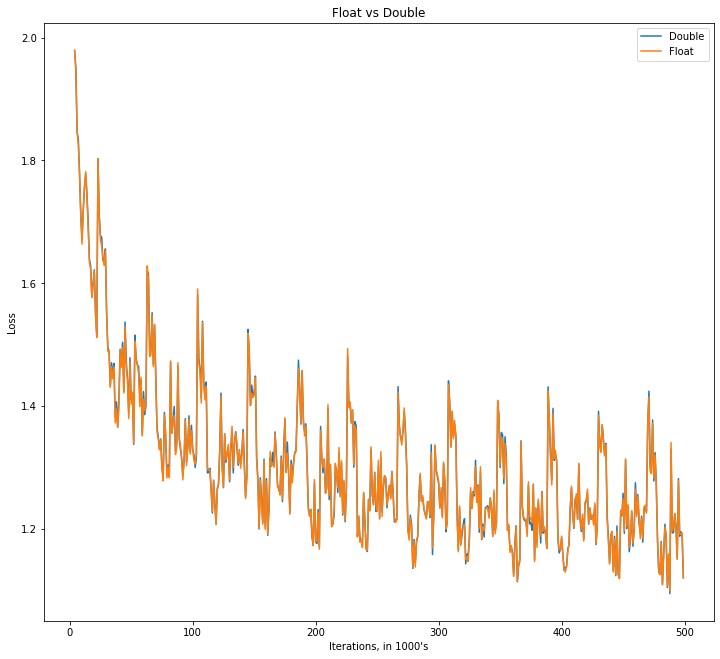

In [7]:
plt.rcParams['figure.figsize'] = [12, 11]
plt.title('Float vs Double')
plt.ylabel("Loss")
plt.xlabel("Iterations, in 1000's")
plt.plot(df_double['Loss'][4:], label = "Double")
plt.plot(df_float['Loss'][4:], label = "Float")
plt.legend()
plt.show()

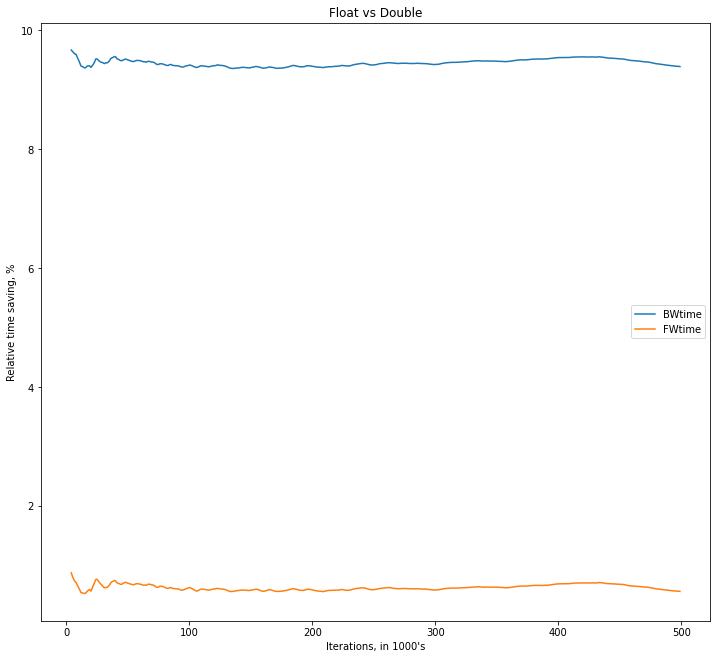

In [8]:
def plot_time_diff(field):
    plt.rcParams['figure.figsize'] = [12, 11]
    plt.ylabel("Relative time saving, %")
    plt.xlabel("Iterations, in 1000's")
    fw = (df_double[field] - df_float[field])/df_double[field]
    plt.plot(fw[4:]*100, label=field)
    
plt.title('Float vs Double')
plot_time_diff('BWtime')
plot_time_diff('FWtime')
plt.legend()
plt.show()